In [1]:
import fun as f
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
import scipy.linalg as la
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from IPython.display import Image

# A, B. Similarity Graphs and Matrices derived from graphs

# 1- Half-moon Dataset:

In [2]:
#Generate data
Npts = 35
half_moons_data = datasets.make_moons(n_samples=Npts, noise=.040, random_state=1991)
nodes_position = dict()
for key  in [i for i in range(Npts)]:
    nodes_position[key] = list(half_moons_data[0][key])

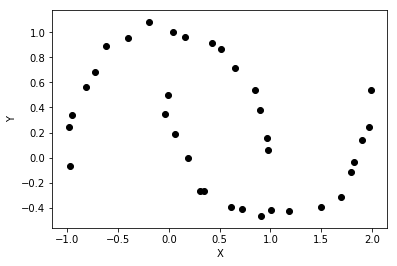

In [3]:
#plot data
f.scatter_plot_data_set(half_moons_data[0], half_moons_data[1],False)

## i) Fully connected graph 

In [4]:
small_sigma = 0.05
W_half_moon = f.adjacency_matrix(half_moons_data[0], sigma=small_sigma)

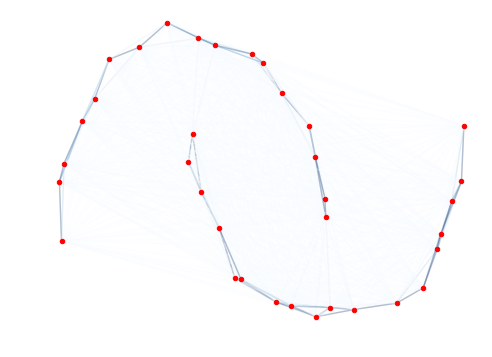

In [6]:
#create graph
hm = f.create_weighted_Graph(W_half_moon)
#Plot graph
f.plot_Graph(hm, nodes_position, title = '',alpha=0.3, output_file_name="fully_connected_graph")

In [7]:
eigenvalues_m, eigenvectors_m = la.eig(f.unnormalized_graph_Laplacian(W_half_moon))
eigenvalues_m=eigenvalues_m.real
rearrangedEvalsVecs_moon_data = sorted(zip(eigenvalues_m,eigenvectors_m.T),key=lambda x: x[0])
eigenvalues_m.sort()

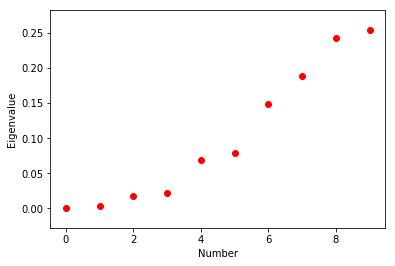

In [8]:
plt.scatter([i for i in range(10)], eigenvalues_m[0:10],c="red")
plt.xlabel ('Number')
plt.ylabel ('Eigenvalue')
plt.show()

In [9]:
Image(url='gif.gif')

## ii) Mutual k-nearest neighbor graph

In [10]:
A = kneighbors_graph(half_moons_data[0], 3, mode='connectivity', include_self=False)
A= A.toarray()

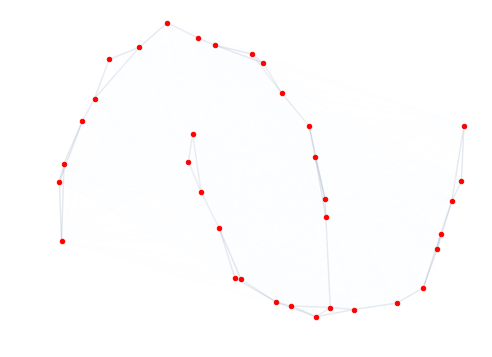

In [12]:
#create graph
km = f.create_weighted_Graph(A)
#Plot graph
f.plot_Graph(km, nodes_position, title = '',edge_vmax=1e-3,alpha=0.1)

# 2- Spiral Dataset

In [13]:
# Toy dataset obtained from:
# https://www.gagolewski.com/resources/data/clustering/
data_path = 'data/spiral.data'
labels_path = 'data/spiral.labels'

In [14]:
data_points, data_labels = f.read_and_convert_data(data_path, labels_path)
Npts, coord = data_points.shape
nodes_position_spiral = dict()
for key  in [i for i in range(Npts)]:
    nodes_position_spiral[key] = list(data_points[key])

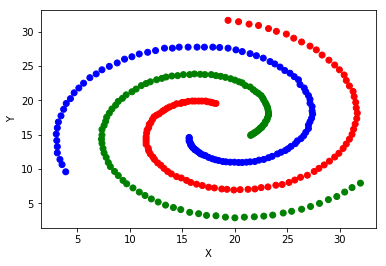

In [15]:
f.scatter_plot_data_set(data_points, data_labels)

In [16]:
W = f.adjacency_matrix(data_points, sigma=0.5)

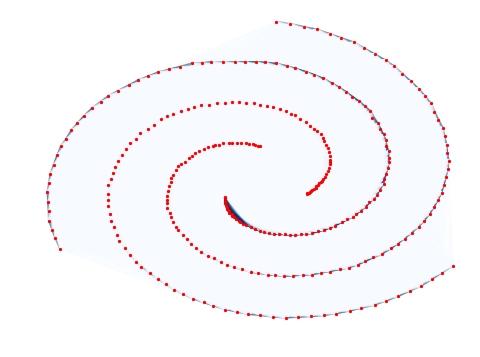

In [17]:
#create graph
spiral_graph = f.create_weighted_Graph(W)
#Plot graph
f.plot_Graph(spiral_graph, nodes_position_spiral, 
               title = '',node_size=5,edge_vmax=1e-8,alpha=0.2)

In [18]:
#Compute the unnormalized graph Laplacian Matrix
L_unnormalized = f.unnormalized_graph_Laplacian(W)

#Sanity check: Symmetric matrix
L_unnormalized.shape
np.allclose(L_unnormalized, L_unnormalized.T)
#np.matmul(L_unnormalized, np.ones(L_unnormalized.shape[0]).reshape(L_unnormalized.shape[0], 1))

True

## Compute eigenvalues-eigenvectors

In [19]:
eigenvalues, eigenvectors = la.eig(L_unnormalized)
eigenvalues = eigenvalues.real
rearrangedEvalsVecs = sorted(zip(eigenvalues,eigenvectors.T),key=lambda x: x[0])
eigenvalues.sort()

## Multiplicity of the first eigenvalue

In [20]:
multiplicity_k = (np.where(eigenvalues < 1e-8)[0].shape[0])
multiplicity_k

3

Given that the multiplicity of the smallest eigenvalue is 3, we can notice from the plot below, that in practice these three eigenvalues are very close to zero but not exactly zero, because as we are working with a fully  connected graph with self-connectivited weights obtained by the Gaussian Function, there will still be a very weak connection between some nodes.

 We can also notice that there is a big jump between  the 3rd and 4rth node which clearly defines the presence of 3 clusters in our data.

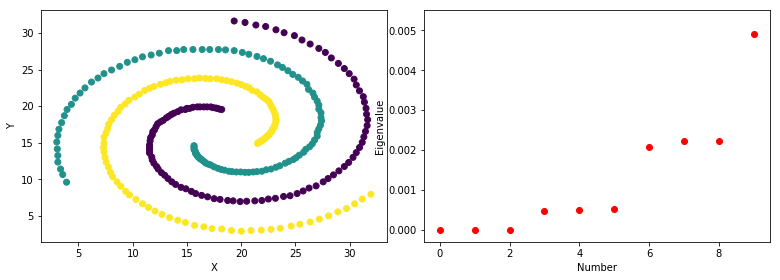

In [21]:
x, y = data_points.T
fig = plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plt.tight_layout()
plt.scatter(x,y,c=data_labels)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter([i for i in range(10)], eigenvalues[0:10],c="red")
plt.ylim(-0.0003, 0.0055)
plt.xlabel ('Number')
plt.ylabel ('Eigenvalue')

plt.show()

### In the second and third eigenvectors, why do we move from one to two steps?
### Why does the projection of the 2nd 3rd eigenvector components are overlap into a single point?
### How about the rest of eigenvectors?

Notice that the elements of the first eigenvector are all aligned in the same y-axis, defining a single component,  in the case of the second eigenvector we can see that the elements are divided by a step defining 2 componenets, while in the case of the third eigenvector, we now have two steps that divides the elements of the eigenvector into three components.

If we now project the 2nd eigenvector into the first eigenvector and the 3rd eigenvector into the 2nd eigenvector, is straightforward to see why all points overlap, creating  a single point (after looking at the eigenvectors figures). Notice that projecting the 2nd into the 1st eigenvector does not provide a proper new representation of the data, as the distance between the yellow and green cluster is very small, however if we had only 2 clusters instead of 3, it will not fail to separate the clusters. 

Furthermore, the projection of the 3rd and 2nd eigenvector offers a new representation of the data that crearly and accurately divides the clusters in our data. Hence, applying k-means or any other clustering algorithm to our new data coordinates will now excel in campturing the geometrical structure of the data.

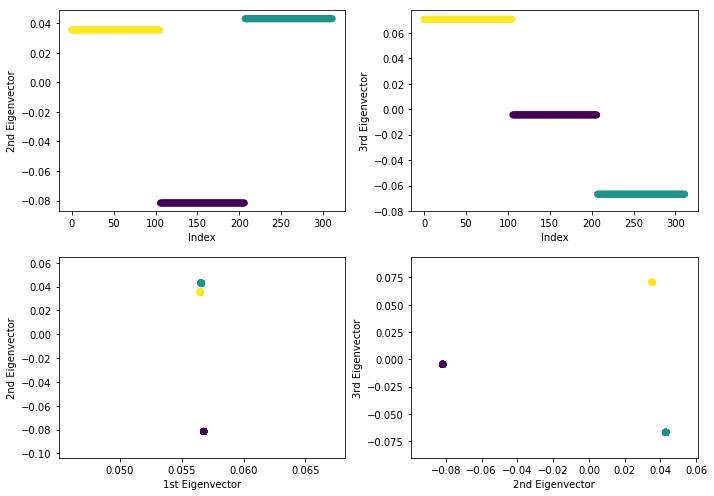

In [22]:
fig = plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.tight_layout()
plt.scatter([i for i in range(Npts)], rearrangedEvalsVecs[1][1],c=data_labels)
plt.xlabel ('Index')
plt.ylabel ('2nd Eigenvector')
plt.ylim(-0.087, 0.049)

plt.subplot(2, 2, 2)
plt.tight_layout()
plt.scatter([i for i in range(Npts)], rearrangedEvalsVecs[2][1],c=data_labels)
plt.xlabel ('Index')
plt.ylabel ('3rd Eigenvector')
plt.ylim(-0.08, 0.078)

plt.subplot(2, 2, 3)
plt.tight_layout()
plt.scatter(rearrangedEvalsVecs[0][1], rearrangedEvalsVecs[1][1],c=data_labels)
plt.xlabel ('1st Eigenvector')
plt.ylabel ('2nd Eigenvector')

plt.subplot(2, 2, 4)
plt.tight_layout()
plt.scatter(rearrangedEvalsVecs[1][1], rearrangedEvalsVecs[2][1],c=data_labels)
plt.xlabel ('2nd Eigenvector')
plt.ylabel ('3rd Eigenvector')

plt.show()

 The figure below plots the eigenvector elements, each corresponding to an element of the graph, with respect to the element index. They are arranged in increasing order according to the the unnormalized graph Laplacian eigenspectrum.
 
If we keep looking into further eigenvectors we can see that the elements do not follow this same step behaviour, i.e the fourth eigenvector do not define 4 components (also $\lambda_4 > 1e-8$), and so on.


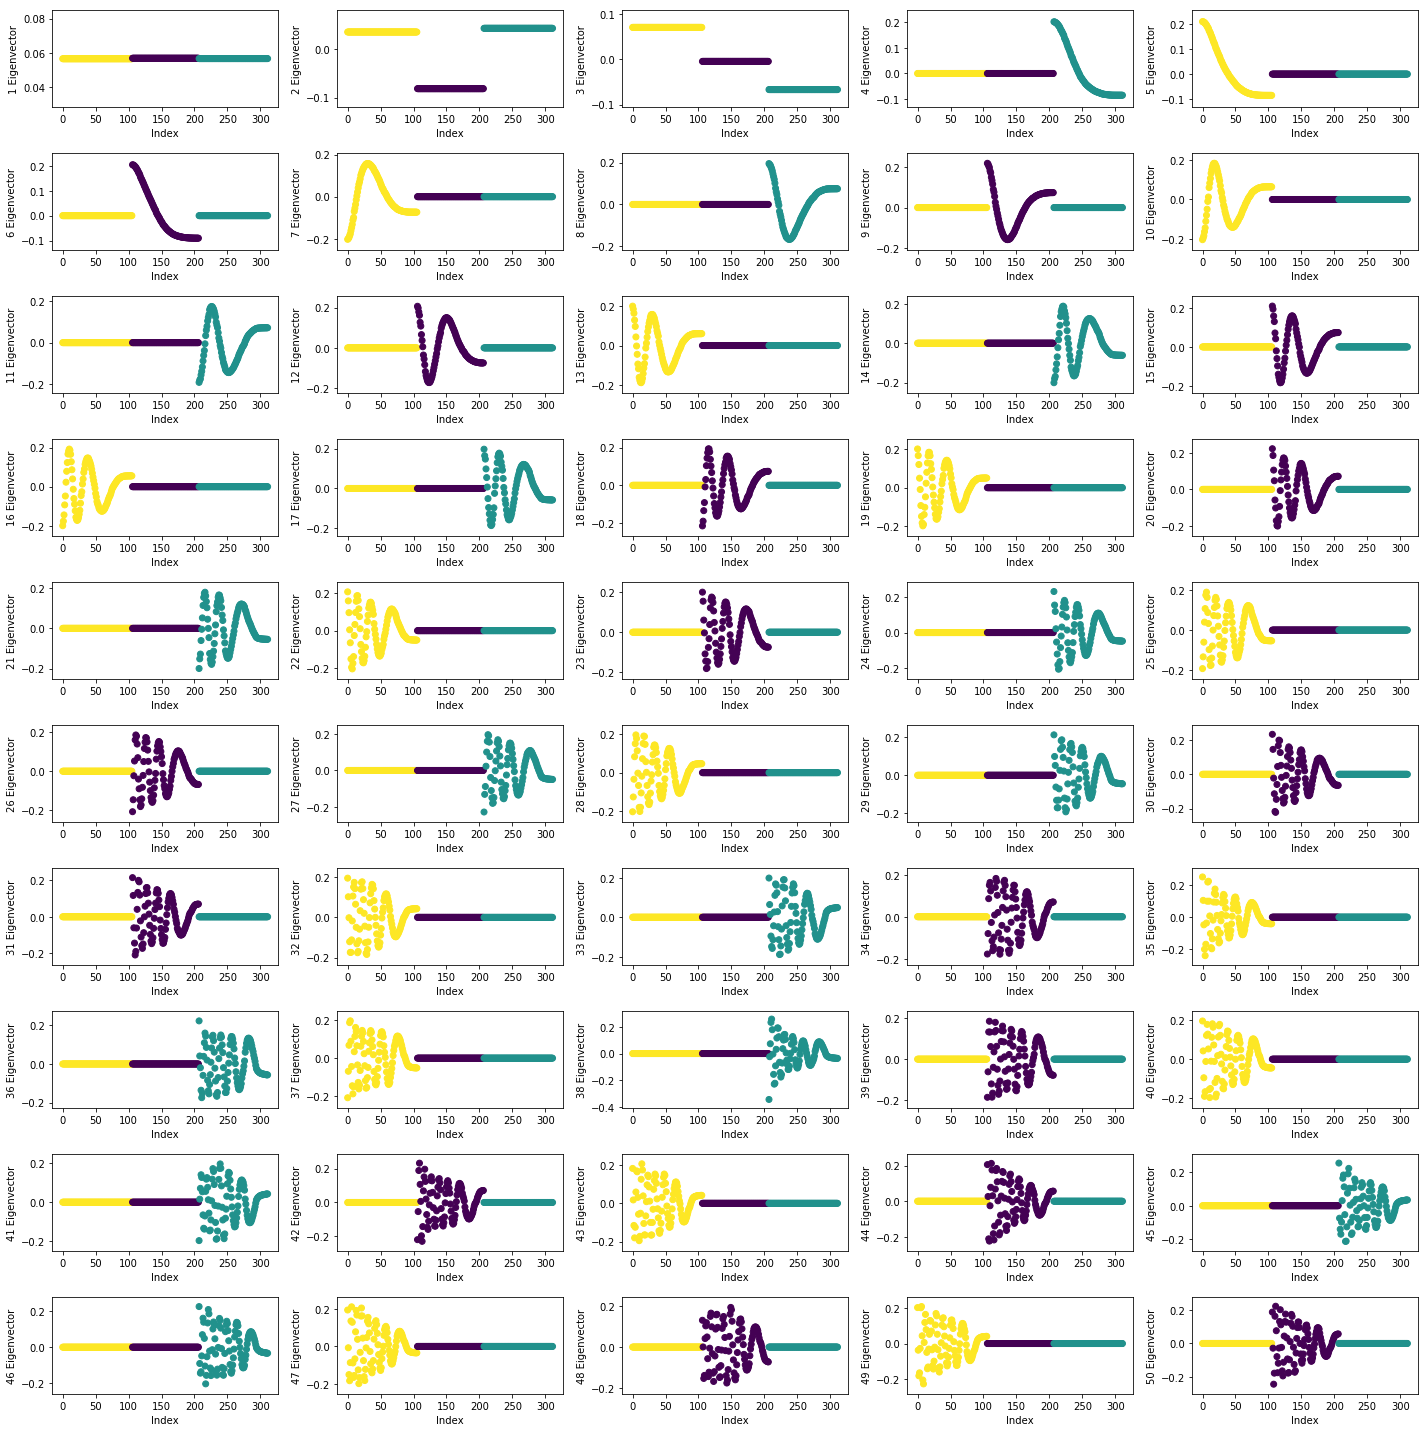

In [23]:
fig = plt.figure(figsize=(20, 20))
for i in range(50):      
    plt.subplot(10, 5, i+1)
    plt.tight_layout()
    plt.scatter([i for i in range(Npts)], rearrangedEvalsVecs[i][1],c=data_labels)
    y_label = str(i+1)+' Eigenvector'
    plt.ylabel (y_label)
    plt.xlabel ('Index')

# IV. The algorithm

## 1. Spiral data set:

In [24]:
#New data coordinates:
V = np.zeros((len(rearrangedEvalsVecs), multiplicity_k-1))
V[:,0]=rearrangedEvalsVecs[1][1]
V[:,1]=rearrangedEvalsVecs[2][1]

#K-means performance before the change of representation of the data:
kmeans_spiral_data_coord = KMeans(n_clusters=3,random_state=0).fit(data_points)
#K-means performance after the change of representation of the data:
kmeans_new_spiral_data_coord = KMeans(n_clusters=3,random_state=0).fit(V)


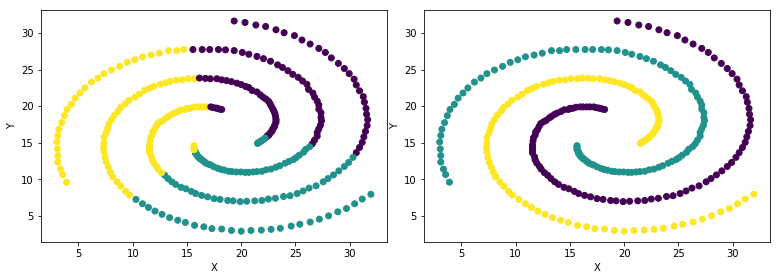

In [25]:
x, y = data_points.T
fig = plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plt.tight_layout()
plt.scatter(x,y,c=kmeans_spiral_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter(x,y,c=kmeans_new_spiral_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 2- Half moon data set

In [26]:
Npts_moon=len(half_moons_data[0])
rearranged2ndEigenVec_moon_data = sorted(
    zip(rearrangedEvalsVecs_moon_data[1][1],half_moons_data[1]),
    key=lambda x: x[0])

#New data coordinates:
V = np.zeros((len(rearrangedEvalsVecs_moon_data), 2))
V[:,0]=rearrangedEvalsVecs_moon_data[1][1]
V[:,1]=rearrangedEvalsVecs_moon_data[2][1]

#K-means performance before the change of representation of the data:
kmeans_moon_data_coord = KMeans(n_clusters=2,random_state=0).fit(half_moons_data[0])
#K-means performance after the change of representation of the data:
kmeans_new_moon_data_coord = KMeans(n_clusters=2,random_state=0).fit(V)


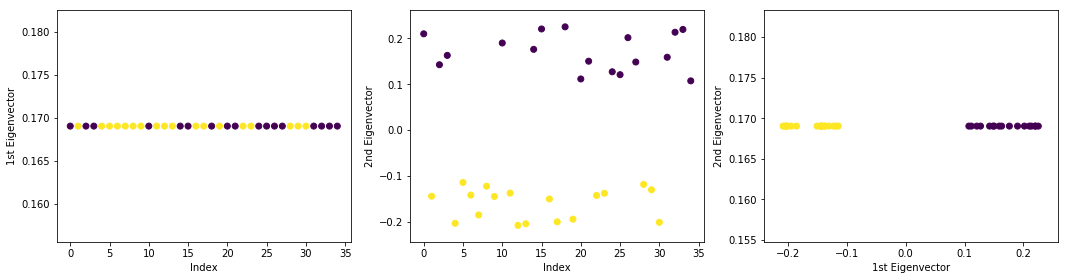

In [27]:
fig = plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.tight_layout()
plt.scatter([i for i in range(Npts_moon)], 
            rearrangedEvalsVecs_moon_data[0][1],c=half_moons_data[1])
plt.ylabel ('1st Eigenvector')
plt.xlabel ('Index')

plt.subplot(1, 3, 2)
plt.tight_layout()
plt.scatter([i for i in range(Npts_moon)], 
            rearrangedEvalsVecs_moon_data[1][1],c=half_moons_data[1])
plt.ylabel ('2nd Eigenvector')
plt.xlabel ('Index')

plt.subplot(1, 3, 3)
plt.tight_layout()
plt.scatter(rearrangedEvalsVecs_moon_data[1][1], 
            rearrangedEvalsVecs_moon_data[0][1],c=half_moons_data[1])
plt.xlabel ('1st Eigenvector')
plt.ylabel ('2nd Eigenvector')
plt.show()

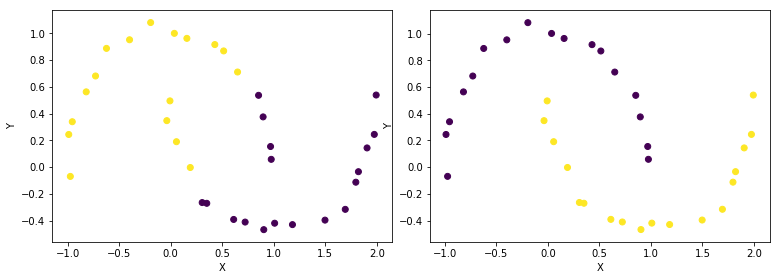

In [28]:
x, y = half_moons_data[0].T
fig = plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plt.tight_layout()
plt.scatter(x,y,c=kmeans_moon_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter(x,y,c=kmeans_new_moon_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# VII. Demostrative Examples:

## A. Imbalanced data set

In [29]:
#Create data points
Npts_imb = 60
Nclusters = 2
np.random.seed(7)
data_coordinates = np.random.normal(loc=0.0, scale=1.0, size=(Npts_imb, 2))
#Assign randomly each datapoint to a cluster
labels = np.random.choice(list(range(Nclusters)),size=Npts_imb,replace=True, p=[0.15,0.85])

In [30]:
#Assign each cluster a mean.
data_means = np.zeros((2,2))
data_means[0,] = [6,5]
data_means[1,] = [11,6]
#Shift the points towards the mean
clusterd_data =data_coordinates+data_means[labels,]

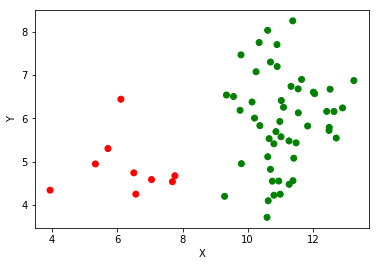

In [31]:
#Plot the data
f.scatter_plot_data_set(clusterd_data, labels)

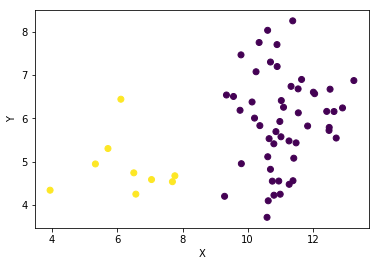

In [32]:
#K-means performance before the change of representation of the data:
kmeans_umbalanced_data = KMeans(n_clusters=2,random_state=0).fit(clusterd_data)

plt.scatter(clusterd_data[:,0],clusterd_data[:,1],c=kmeans_umbalanced_data.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [33]:
W_umbalanced_data = f.adjacency_matrix(clusterd_data, sigma=2)

In [34]:
eigenvalues_umb_data, eigenvectors_umb_data = la.eig(f.unnormalized_graph_Laplacian(W_umbalanced_data))
eigenvalues_umb_data = eigenvalues_umb_data.real
rearrangedEvalsVecs_umb_data = sorted(zip(eigenvalues_umb_data,eigenvectors_umb_data.T),key=lambda x: x[0])
eigenvalues_umb_data.sort()

In [35]:
rearranged2ndEigenVec_umb_data = sorted(
    zip(rearrangedEvalsVecs_umb_data[1][1],labels),
    key=lambda x: x[0])

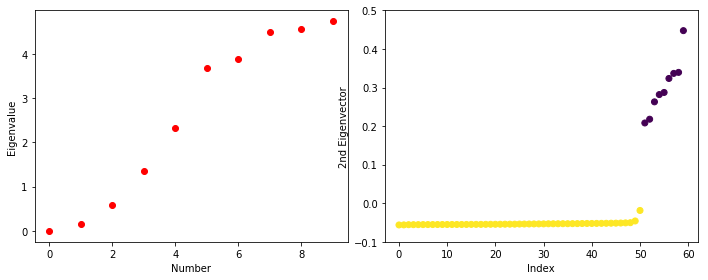

In [36]:
fig = plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.tight_layout()

plt.scatter([i for i in range(10)], eigenvalues_umb_data[0:10],c="red")
plt.xlabel ('Number')
plt.ylabel ('Eigenvalue')

plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter([i for i in range(60)], [rearranged2ndEigenVec_umb_data[i][0] for i in range(60)],
            c=[rearranged2ndEigenVec_umb_data[i][1] for i in range(60)])
plt.ylim(-0.1,0.5)
plt.xlabel ('Index')
plt.ylabel ('2nd Eigenvector')
plt.show()

## B. Detecting the number of clusters - hirarchical organizations in the data set

In [37]:
#Create data points
Npts_imb = 100
Nclusters = 4
np.random.seed(1991)
data_coordinates = np.random.normal(loc=0.0, scale=1.0, size=(Npts_imb, 2))
#Assign randomly each datapoint to a cluster
labels = np.random.choice(list(range(Nclusters)),size=Npts_imb,replace=True, p=[0.35,0.15,0.35,0.15])

In [38]:
#Assign each cluster a mean.
data_means = np.zeros((4,2))
data_means[0,] = [6.5,2.5]
data_means[1,] = [6.5,9.5]
data_means[2,] = [-5,2]
data_means[3,] = [-6,8.58]
#Shift the points towards the mean
clusterd_data =data_coordinates+data_means[labels,]

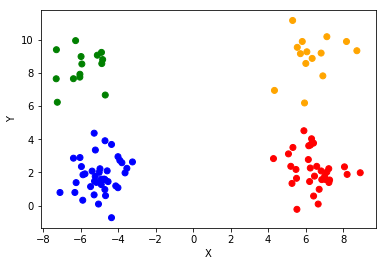

In [39]:
#Plot the data with original labels
f.scatter_plot_data_set(clusterd_data, labels)

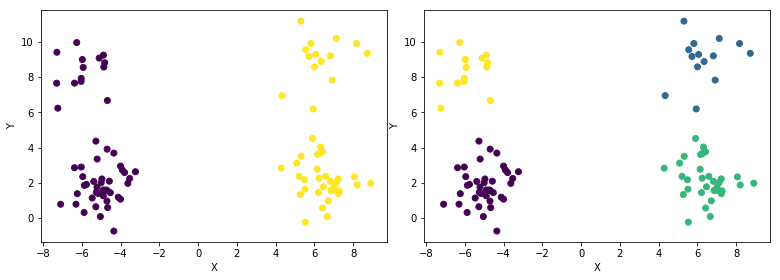

In [40]:
#K-means performance before the change of representation of the data:
kmeans_non_hirarchical = KMeans(n_clusters=2,random_state=0).fit(clusterd_data)
kmeans_hirarchical = KMeans(n_clusters=4,random_state=0).fit(clusterd_data)

fig = plt.figure(figsize=(11, 4))

#Plot data
plt.subplot(1, 2, 1)
plt.tight_layout()
plt.scatter(clusterd_data[:,0],clusterd_data[:,1],c=kmeans_non_hirarchical.labels_)
plt.xlabel("X")
plt.ylabel("Y")

#Plot sorted eigenvectors
plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter(clusterd_data[:,0],clusterd_data[:,1],c=kmeans_hirarchical.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [41]:
W_umbalanced_data = f.adjacency_matrix(clusterd_data, sigma=10)

In [42]:
eigenvalues_umb_data, eigenvectors_umb_data = la.eig(f.unnormalized_graph_Laplacian(W_umbalanced_data))
eigenvalues_umb_data.sort()
eigenvalues_umb_data=eigenvalues_umb_data.real

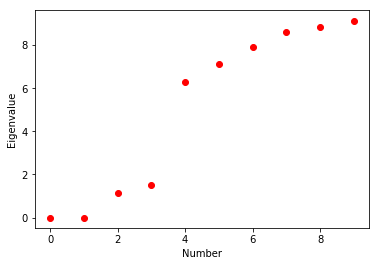

In [43]:
plt.scatter([i for i in range(10)], eigenvalues_umb_data[0:10],c="red")
plt.xlabel ('Number')
plt.ylabel ('Eigenvalue')
plt.show()

## C. Sensitivity to parameter selection

In [44]:
large_sigma = 0.1
W_half_moon_large_sigma = f.adjacency_matrix(half_moons_data[0], sigma=large_sigma)
eigenvalues_large_sigma, eigenvectors_large_sigma = la.eig(
    f.unnormalized_graph_Laplacian(W_half_moon_large_sigma))
eigenvalues_large_sigma=eigenvalues_large_sigma.real

rearrangedEvalsVecs_moon_data_large_sigma = sorted(
    zip(eigenvalues_large_sigma,eigenvectors_large_sigma.T),key=lambda x: x[0])
eigenvalues_large_sigma.sort()

rearranged2ndEigenVec_moon_data_large_sigma = sorted(
    zip(rearrangedEvalsVecs_moon_data_large_sigma[1][1],half_moons_data[1]),
    key=lambda x: x[0])

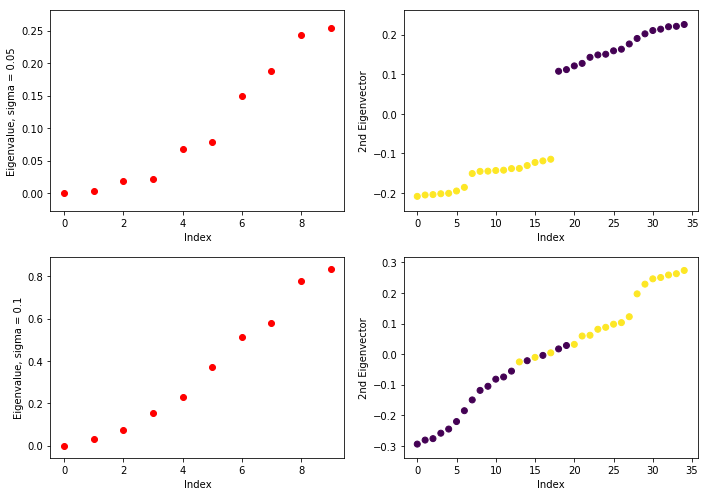

In [45]:
fig = plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.tight_layout()

plt.scatter([i for i in range(10)], eigenvalues_m[0:10],c="red")
plt.xlabel ('Index')
ylabel = "Eigenvalue, sigma = " +str(small_sigma)
plt.ylabel (ylabel)

plt.subplot(2, 2, 2)
plt.tight_layout()
plt.scatter([i for i in range(Npts_moon)], 
            [rearranged2ndEigenVec_moon_data[i][0] for i in range(Npts_moon)],
            c=[rearranged2ndEigenVec_moon_data[i][1] for i in range(Npts_moon)])
plt.xlabel ('Index')
plt.ylabel ('2nd Eigenvector')

plt.subplot(2, 2, 3)
plt.tight_layout()
plt.scatter([i for i in range(10)], eigenvalues_large_sigma[0:10],c="red")
plt.xlabel ('Index')
ylabel = "Eigenvalue, sigma = " +str(large_sigma)
plt.ylabel (ylabel)

plt.subplot(2, 2, 4)
plt.tight_layout()
plt.tight_layout()
plt.scatter([i for i in range(Npts_moon)], 
            [rearranged2ndEigenVec_moon_data_large_sigma[i][0] for i in range(Npts_moon)],
            c=[rearranged2ndEigenVec_moon_data_large_sigma[i][1] for i in range(Npts_moon)])
plt.xlabel ('Index')
plt.ylabel ('2nd Eigenvector')
plt.show()

## 3- Circles data set

In [46]:
# Generate data set:
Npts_list = [400, 250, 70]
rad_list = [10, 6, 2]
lower_boundry_list=[0.7, 0.5, 0.3]
circle_data_points = f.generate_3circles_data_set(Npts_list, rad_list,lower_boundry_list, seed=1991)

In [47]:
#Generate adjacency matrix:
W_circles_dataset = f.adjacency_matrix(circle_data_points[:,0:2], sigma=1)
#Generate the Normalized symmetric graph Laplacian matrix:
L_normalized_circles_dataset = f.normalized_graph_Laplacian(W_circles_dataset, matrix = "symmetric")

#Compute eigenvalues/eigenvectors
eigenvalues_circles_dataset, eigenvectors_circles_dataset = la.eig(L_normalized_circles_dataset)
eigenvalues_circles_dataset = eigenvalues_circles_dataset.real

#Create dictionary with sorting the eigenvalues
dic_EvalsEvecs_circle_data = sorted(
    zip(eigenvalues_circles_dataset,eigenvectors_circles_dataset.T),key=lambda x: x[0])
eigenvalues_circles_dataset.sort()

### Multiplicity of the first eigenvalue

In [48]:
#Determine the number of clusters
multiplicity_k = np.where(eigenvalues_circles_dataset <= 1e-3)[0].shape[0]

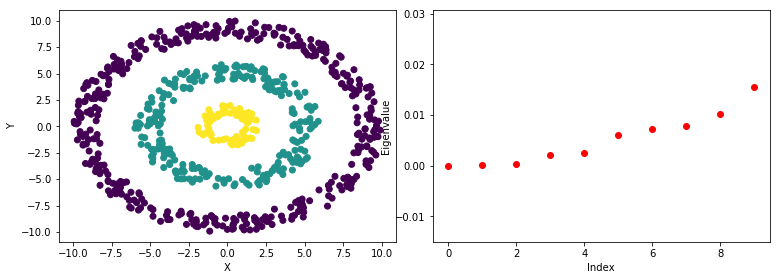

In [49]:
x, y,z = circle_data_points.T
fig = plt.figure(figsize=(11, 4))

#Plot data
plt.subplot(1, 2, 1)
plt.tight_layout()
plt.scatter(x,y,c=z)
plt.xlabel("X")
plt.ylabel("Y")

#Plot sorted eigenvectors
plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter([i for i in range(10)], eigenvalues_circles_dataset[0:10],c="red")
plt.xlabel ('Index')
plt.ylabel ('Eigenvalue')
plt.show()


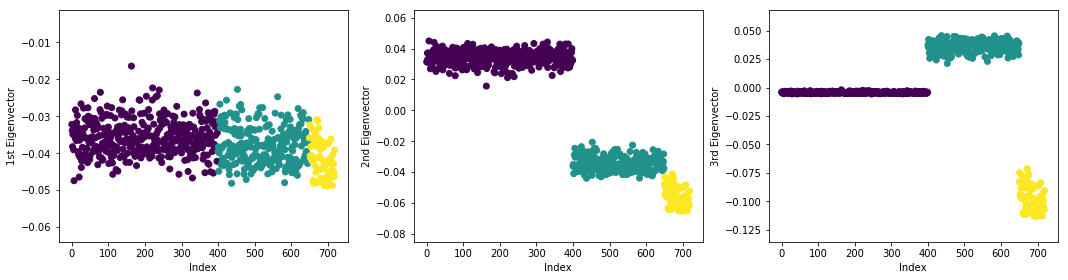

In [50]:
fig = plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.tight_layout()
plt.scatter([i for i in range(len(dic_EvalsEvecs_circle_data))], 
            dic_EvalsEvecs_circle_data[0][1],c=z)
plt.xlabel ('Index')
plt.ylabel ('1st Eigenvector')

plt.subplot(1, 3, 2)
plt.tight_layout()
plt.scatter([i for i in range(len(dic_EvalsEvecs_circle_data))], 
            dic_EvalsEvecs_circle_data[1][1],c=z)
plt.xlabel ('Index')
plt.ylabel ('2nd Eigenvector')

plt.subplot(1, 3, 3)
plt.tight_layout()
plt.scatter([i for i in range(len(dic_EvalsEvecs_circle_data))],
            dic_EvalsEvecs_circle_data[2][1],c=z)
plt.xlabel ('Index')
plt.ylabel ('3rd Eigenvector')

plt.show()

# The algorithm:

In [51]:
#New data coordinates:
V = np.zeros((len(dic_EvalsEvecs_circle_data), multiplicity_k-1))
V[:,0]=dic_EvalsEvecs_circle_data[1][1]
V[:,1]=dic_EvalsEvecs_circle_data[2][1]

#K-means performance before the change of representation of the data:
kmeans_spiral_data_coord = KMeans(n_clusters=3,random_state=0).fit(circle_data_points[:,0:2])
#K-means performance after the change of representation of the data:
kmeans_new_spiral_data_coord = KMeans(n_clusters=3,random_state=0).fit(V)


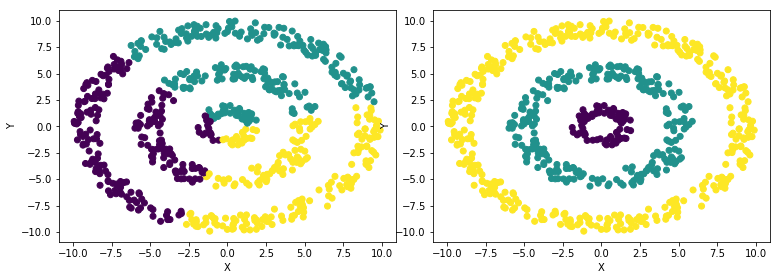

In [52]:
fig = plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plt.tight_layout()
plt.scatter(x,y,c=kmeans_spiral_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter(x,y,c=kmeans_new_spiral_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# VIII. Validation - Circles dataset

## Pearson correlation coefficient with a *similarity matrix* defined by the Euclidean distance:

In [53]:
incidence_matrix = f.incidence_matrix(z)
similarity_matrix_eucledian_d = f.distance_matrix(circle_data_points[:,0:2], "eucledian_dist")

In [54]:
f.correlation_coefficient(incidence_matrix, similarity_matrix_eucledian_d)

0.09362574783855335

## Pearson correlation coefficient with a *similarity matrix* defined by the Euclidean Commute Time Distance:

In [55]:
similarity_matrix_CTD = f.distance_matrix(dic_EvalsEvecs_circle_data,"commute_time_distance", W_circles_dataset)
f.correlation_coefficient(incidence_matrix, similarity_matrix_CTD)

-0.8625057567903386